# Machine Learning Intro
## Labs day 1

Please complete the exercises assignments in this notebook.

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
# InteractiveShell.ast_node_interactivity = "all" 
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

## Assignment 1: Handwritten digit recognition
The [MNIST dataset](https://www.openml.org/d/554) contains 70,000 images of handwritten digits (0-9) represented by 28 by 28 pixel values. We can easily download it from OpenML and visualize one of the examples:

In [2]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = '11e82c8d91c5abece86f424369c71590'

Class label: 5


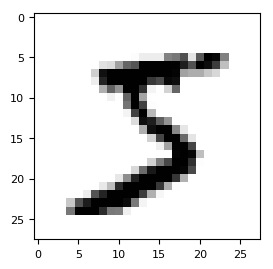

In [3]:
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
# Get the predictors X and the labels y
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); 
# Take the first example, reshape to a 28x28 image and plot
plt.imshow(X[0].reshape(28, 28), cmap=plt.cm.gray_r) 
print("Class label:",y[0]) # Print the correct class label

### Part 1
- Evaluate a k-Nearest Neighbor classifier with its default settings.
    - Use the first 6,000 examples as the training set and the next 1,000 as the test set
    - What is the predictive accuracy?
    - Find a few misclassifications, and plot them together with the true labels (as above). Are these images really hard to classify?

### Part 2
- Optimize the value for the number of neighbors $k$ (keep $k$ < 50) on a stratified subsample (e.g. 10%) of the data
    - Use 10-fold crossvalidation and plot $k$ against the misclassification rate. Which value of $k$ should you pick?
    - Do the same but with 100 bootstrapping repeats. Are the results different? Explain.

### Part 3
- Compare kNN against the linear classification models that we have covered in the course (logistic regression and linear SVMs).
    - First use the default hyperparameter settings.
    - Next, optimize for the degree of regularization ($C$) and choice of penalty (L1/L2). Again, plot the accuracy while increasing the degree of regularization for different penalties. Interpret the results. 
    - Report the optimal performance. Can you get better results than kNN?

Report all results clearly and interpret the results. 

Hint: if necessary, ou can speed up experiments by taking a smaller sample of the data  
Hint: you can easily take a 10% stratified subsample in scikit-learn like this, and then continue with X_sample and y_sample. You can also use this subsample in the 3rd subquestion if it takes too long to run in on the whole dataset.
```X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, stratify=y)```  
Hint: the $C$ parameter is typically varied on a log scale between $2^{-15}$ and $2^{15}$. You can also use something like [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]. The important thing is that you check that the optimal value lies within the range that you checked.

## Assignment 2: A regression benchmark
Consider the liver-disorder dataset (http://www.openml.org/d/8). The goal is to predict how much alcohol someone consumed based on blood test values.

- Take a selection of the algorithms that we covered in class that can do regression.
- Based on what you learned in the previous exercises, make educated guesses about good hyperparameter values and set up a grid or random search.
- Evaluate all models with 10-fold cross-validation and root mean squared error (RMSE). Report all results. Which model yields the best results?

Hint: negative mean squared error (neg_MSE) is a standard scoring technique in ```GridSearchCV``` and ```cross_val_score```. You'll have to inverse the sign and compute the square roots yourself. Of course, during a grid search you can just use neg_MSE, the optimal hyperparameter values will be the same.

## Assignment 3: Explore your own data 
* Find a dataset that fascinates you
* Put it on OpenML, tag with 'TUe-ml'
* Build and share any machine learning model on it

This is to let you (and me) come in contact with issues not covered/foreseen in the course, and get feedback.

### Rules
* The dataset should not already be on OpenML.
* Tabular (e.g. CSV) data, representing a classification or regression problem
    * You'll need to convert to the ARFF format (see below)
* In 1 file, Multi-variate (multiple columns), at least 100 instances (rows)
* No text/image data, unless already featurized
* A public (!) dataset found on:
    * Your own hard drive. One that is interesting and you don't mind sharing.
    * Kaggle open datasets: https://www.kaggle.com/datasets
    * Data.world: https://data.world/
    * Wolfram Alpha: https://datarepository.wolframcloud.com/
    * More: https://git.io/vdTXm
* Make sure you _understand_ the data, and provide a clear description for your classmates

### Finally
* Convert the dataset to ARFF. A script 'csv2arff' is provided, may need some manual post-processing.
* Upload via the OpenML website or via the Python API.
* Run any machine learning model successfully and publish the run.